In [4]:
import torch
import torchvision
torchvision.disable_beta_transforms_warning()
import torchvision.transforms.v2 as transforms
import matplotlib.pyplot as plt

import mininet
import torchmetrics

from train import normalize
import mininet
import datasets

In [5]:
transform = transforms.Compose([
    transforms.Resize((256, 512), interpolation=transforms.InterpolationMode.NEAREST),
    transforms.ToImageTensor(),
])

device = 'cuda:0'

# Use val dataset, since test labels are unknown
data = datasets.Cityscapes('data/cityscapes', split='val', mode='fine', use_train_classes=True, target_type='semantic', transforms=transform)
dataloader = torch.utils.data.DataLoader(data, batch_size=16, shuffle=False)

model = mininet.MiniNetv2(3, data.num_classes, interpolate=True)

model.load_state_dict(torch.load('pretrained/mininet_cityscapes.tar')['model_state_dict'])

model = model.to(device)
model.eval()

jaccard = torchmetrics.JaccardIndex(task='multiclass', num_classes=data.num_classes, ignore_index=data.ignore_index)

tensor(0.4648)

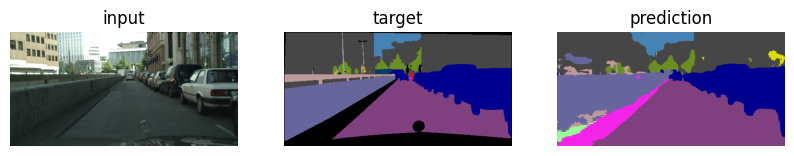

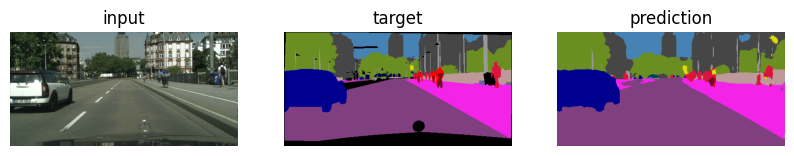

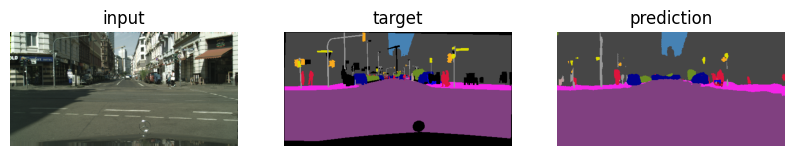

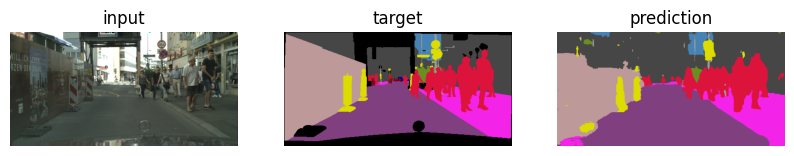

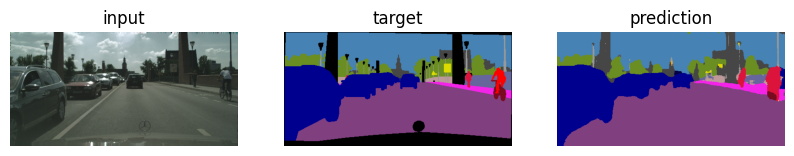

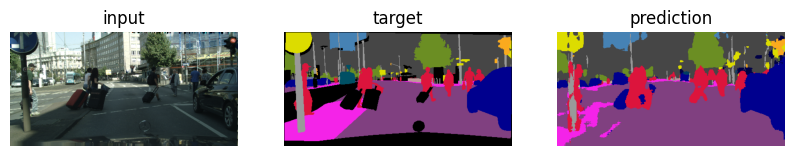

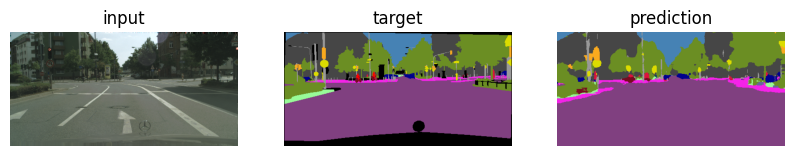

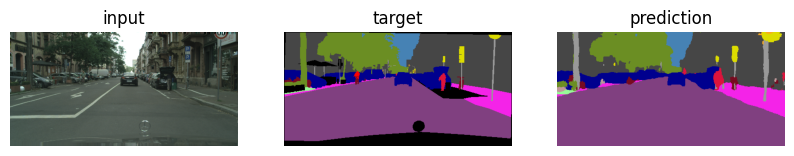

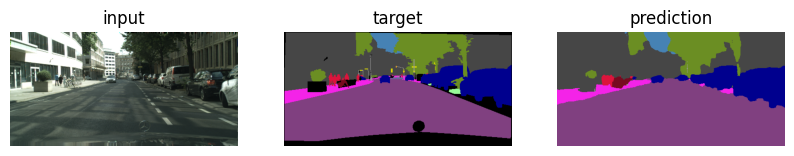

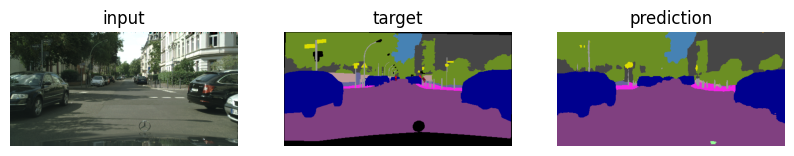

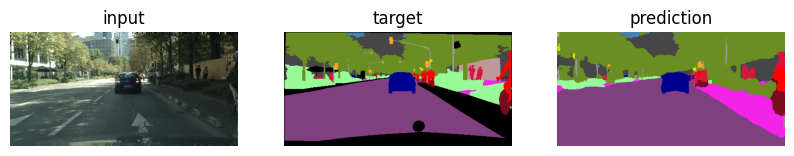

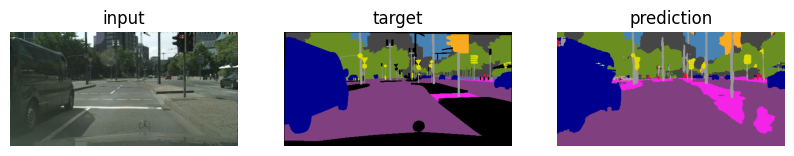

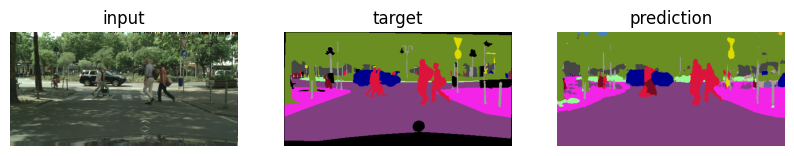

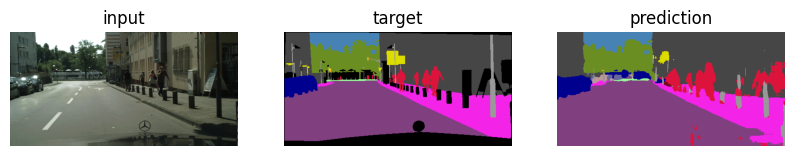

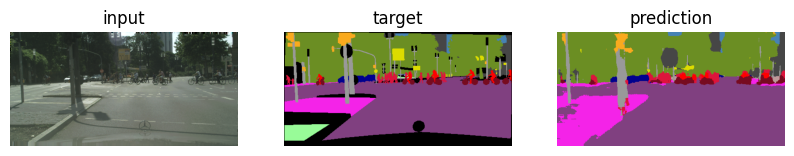

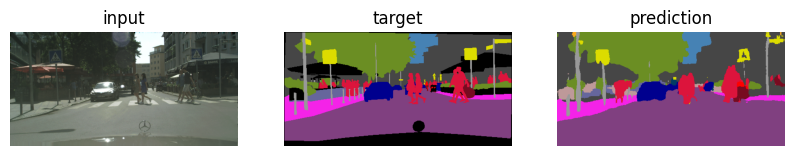

In [6]:
# Plot a single batch
x, y = next(iter(dataloader))

x = normalize(x).to(device=device)
y = y.squeeze().long()
output = model(x)
y_pred = output.argmax(dim=1).cpu()

for i in range(16):
    plt.figure(figsize=(10, 25))
    plt.subplot(131)
    plt.imshow(x[i].cpu().permute(1, 2, 0) + 0.5)
    plt.title('input')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(data.color_labels(y[i]))
    plt.title('target')
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(data.color_labels(y_pred[i]))
    plt.title('prediction')
    plt.axis('off')

jaccard(y_pred, y)